CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [218]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [219]:
#setting the current working directory
import os
os.chdir("/Users/sushmaprakash")

In [220]:
# to make sure the desired location working directory is set  
os.getcwd()

'/Users/sushmaprakash'

In [221]:
#reading the data in csv format
credit = pd.read_csv("credit-card-data.csv")

In [222]:
# lets look at the data read.
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [223]:
# lets get insights on different features present in the data and its dtypes
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [224]:
#lets see the no. of cols and rows in the data
credit.shape

(8950, 18)

In [225]:
#lets see the datatypes of features of the data
credit.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [226]:
# statistical glance at data
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Missing value analysis

Missing value analysis:
I will be using KNN imputation for the missing values.

In [227]:
missing_value = pd.DataFrame(credit.isnull().sum())

missing_value = missing_value.reset_index()

missing_value = missing_value.rename(columns= {'index': 'variables', 0:'missing_percentage'})

missing_value

,variables,missing_percentage
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


In [228]:
missing_value['missing_percentage'] = (missing_value['missing_percentage']/len(credit))*100

missing_value = missing_value.sort_values('missing_percentage', ascending=False).reset_index(drop=True)

missing_value

,variables,missing_percentage
0,MINIMUM_PAYMENTS,3.497207
1,CREDIT_LIMIT,0.011173
2,CUST_ID,0.000000
3,BALANCE,0.000000
4,PRC_FULL_PAYMENT,0.000000
5,PAYMENTS,0.000000
6,PURCHASES_TRX,0.000000
7,CASH_ADVANCE_TRX,0.000000
8,CASH_ADVANCE_FREQUENCY,0.000000
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In the above table, we can observe that only the 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' has missing value percentage of less than 30percent
we have to impute the missing values and cannot be droped.I would be using the KNN imputation to impute the missing values.reason being when compared to mean and median imputation the KNN imputation were much closer to the actual value and this can be seen in credit practise ipynb notebook.

In [229]:
from fancyimpute import KNN

In [230]:
#KNN imputation
#converting all column values in to object type
lis = []
for i in range(0, credit.shape[1]):
    #print(i)
    if(credit.iloc[:,i].dtypes == 'object'):
        credit.iloc[:,i] = pd.Categorical(credit.iloc[:,i])
        
        credit.iloc[:,i] = credit.iloc[:,i].cat.codes 
        credit.iloc[:,i] = credit.iloc[:,i].astype('object')
        
        lis.append(credit.columns[i])

In [231]:
#replace -1 with NA to impute
for i in range(0, credit.shape[1]):
    credit.iloc[:,i] = credit.iloc[:,i].replace(-1, np.nan)

In [232]:
credit = pd.DataFrame(KNN(k = 3).fit_transform(credit), columns = credit.columns)

Imputing row 1/8950 with 0 missing, elapsed time: 22.629
Imputing row 101/8950 with 0 missing, elapsed time: 22.633
Imputing row 201/8950 with 0 missing, elapsed time: 22.635
Imputing row 301/8950 with 0 missing, elapsed time: 22.637
Imputing row 401/8950 with 0 missing, elapsed time: 22.639
Imputing row 501/8950 with 0 missing, elapsed time: 22.640
Imputing row 601/8950 with 0 missing, elapsed time: 22.641
Imputing row 701/8950 with 0 missing, elapsed time: 22.643
Imputing row 801/8950 with 0 missing, elapsed time: 22.644
Imputing row 901/8950 with 0 missing, elapsed time: 22.648
Imputing row 1001/8950 with 0 missing, elapsed time: 22.650
Imputing row 1101/8950 with 0 missing, elapsed time: 22.652
Imputing row 1201/8950 with 0 missing, elapsed time: 22.653
Imputing row 1301/8950 with 0 missing, elapsed time: 22.654
Imputing row 1401/8950 with 0 missing, elapsed time: 22.656
Imputing row 1501/8950 with 0 missing, elapsed time: 22.656
Imputing row 1601/8950 with 0 missing, elapsed time:

In [233]:
#to see if there is any still missing values

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

## Overview about Outliers

In [234]:
np.unique(credit['CUST_ID']).any()
# here custumer ids are unique

True

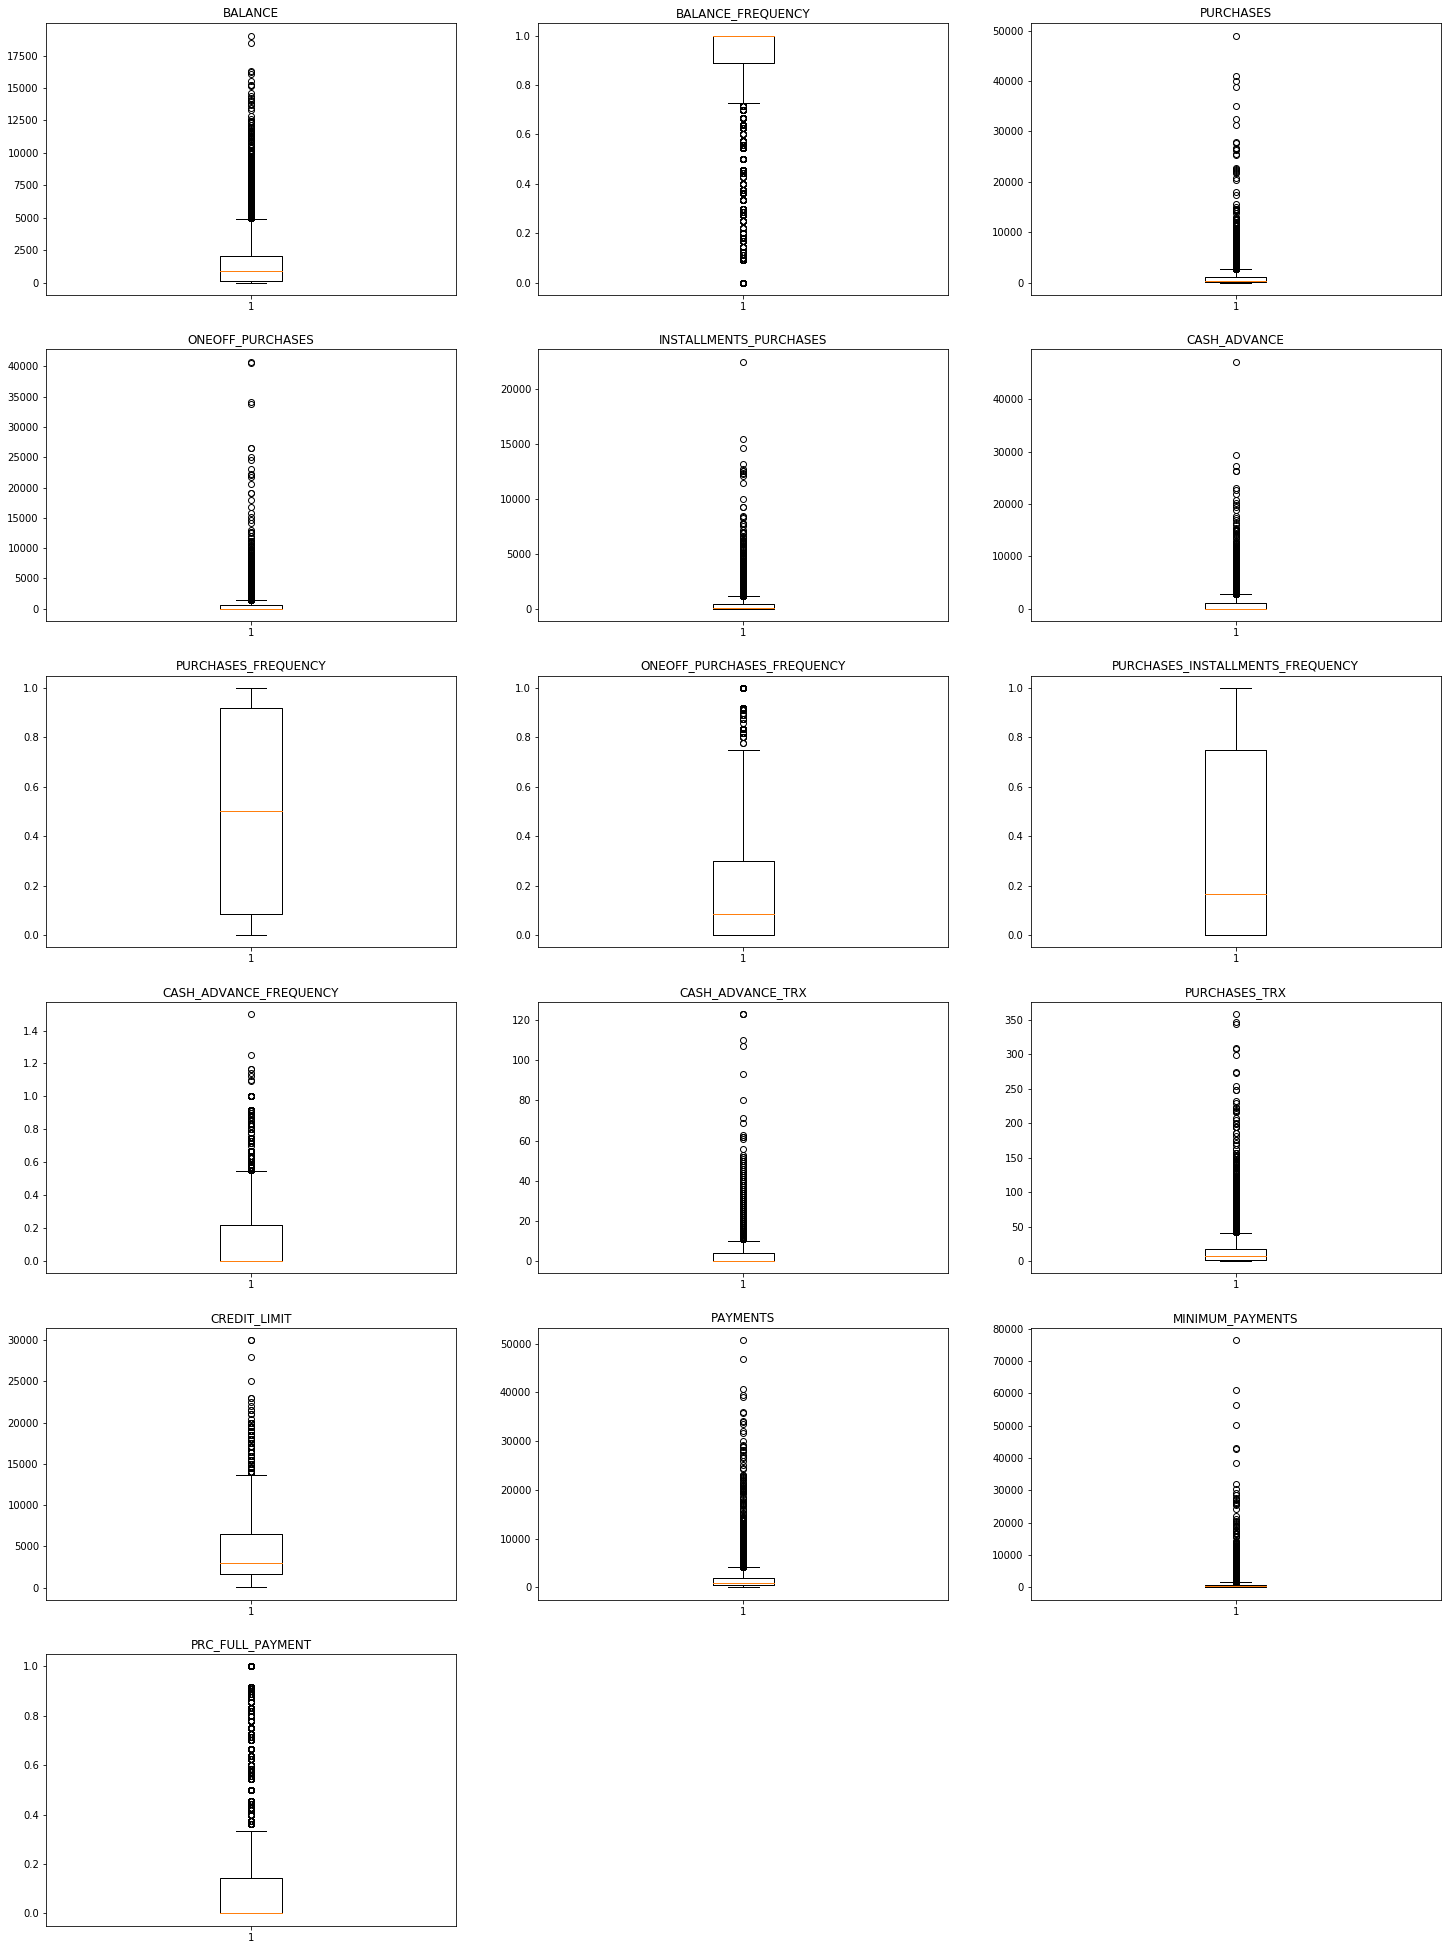

In [235]:
plt.figure(figsize=(25,35))

cnames = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

for i in range(0,16):
    plt.subplot(6,3, i+1)
    plt.boxplot(credit[cnames[i]])
    plt.title(cnames[i])
    

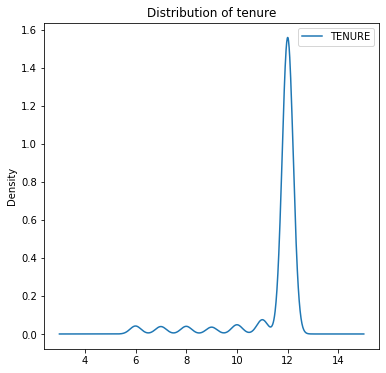

In [236]:
#lets see the distribution of the 'TENURE' alone using KDE plots

credit[['TENURE']].plot.kde(figsize=(6,6), title= 'Distribution of tenure')


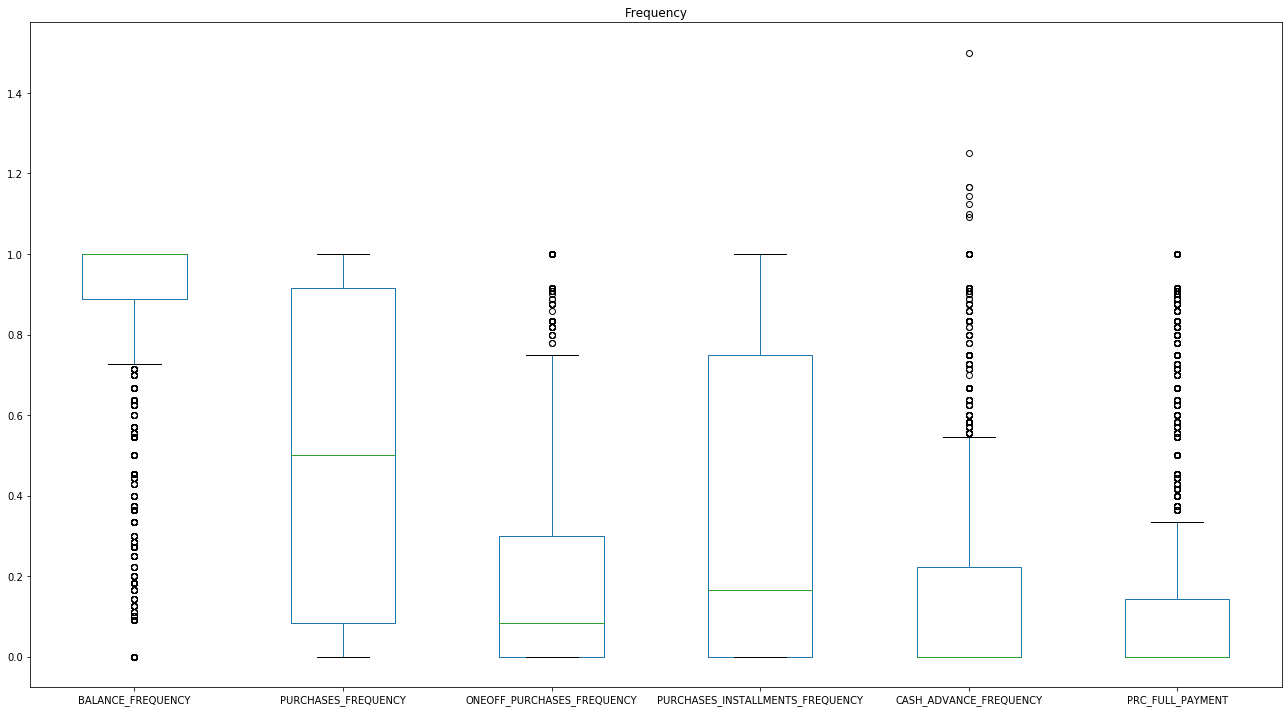

In [237]:
# considering the box plots of only frequency named variables.
credit[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

As we can see through the boxplots plotted above that we have many outliers, as this is a clustering, I decided to go without outlier's replacement. 

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

For now, I will choose not to do anything with outliers because this may harm the clustering.


## Feature selection

Since we are dealing with numeric data im choosing correlation analysis to see if any variables are carrying redundant information.

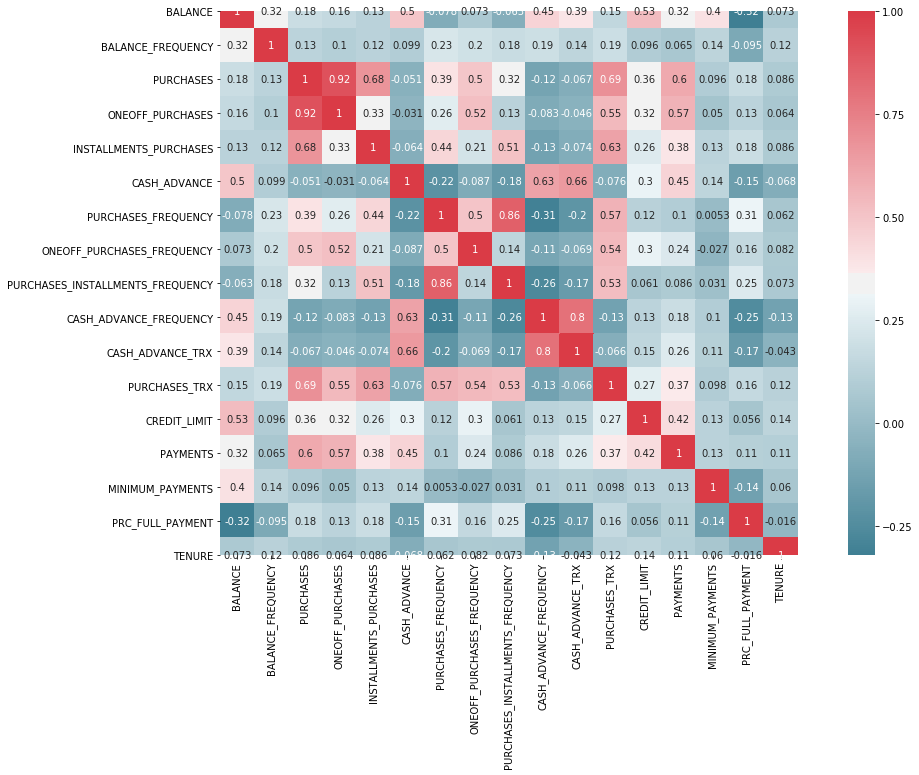

In [238]:
##Correlation analysis
#Correlation plot
cnames = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

df_corr = credit.loc[:,cnames]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(18, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)


## Deriving new KPI's

KPI’s such as monthly average purchase and cash advance amount,
purchases by type (one-off, instalments), average amount per purchase and
cash advance transaction, limit usage (balance to credit limit ratio), payments to
minimum payments ratio

In [239]:
#lets create new columns for kpi's using existing variables
credit['Monthly_average_purchase'] = credit['PURCHASES']/credit['TENURE']

credit['cash_advance_amount'] = credit['CASH_ADVANCE']/credit['TENURE']

credit['limit_usage'] = credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

credit['payment_minpay'] = credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)



In [240]:
credit.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,cash_advance_amount,limit_usage,payment_minpay
0,0.0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1.446508
1,1.0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,0.457495,3.826241
2,2.0,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0.991682
3,3.0,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1.0,7500.0,0.000000,687.775400,0.000000,12.0,124.916667,17.149001,0.222223,0.000000
4,4.0,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,2.771075
5,5.0,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,111.106667,0.000000,1.005460,0.581601
6,6.0,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,590.917500,0.000000,0.046464,32.081820
7,7.0,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,12.0,2300.0,679.065082,532.033990,0.000000,12.0,36.350000,0.000000,0.792892,1.276357
8,8.0,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,5.0,7000.0,688.278568,311.963409,0.000000,12.0,71.790833,0.000000,0.144989,2.206280
9,9.0,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,106.800000,0.000000,0.013839,11.612605


In [241]:
#checking again to see if any missing values
credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_average_purchase            0
cash_advance_amount                 0
limit_usage                         0
payment_minpay                      0
dtype: int64

In [242]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,cash_advance_amount,limit_usage,payment_minpay
0,0.0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1.446508
1,1.0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,0.457495,3.826241
2,2.0,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0.991682
3,3.0,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1.0,7500.0,0.000000,687.775400,0.000000,12.0,124.916667,17.149001,0.222223,0.000000
4,4.0,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,2.771075


In [243]:
#lets create another important KPI #Purchase by type# i.e to understand what type of purchase
# is carried out by users like installments or one offs or both?

credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(30)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [244]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 22)

In [245]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 22)

In [246]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 22)

In [247]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 22)

from the above details we can see that there are 4 types of behavioural purchase, hence categorical variables will be derived in the following codes.

In [248]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'None'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'oneOff&installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'Installment'

In [249]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [250]:
credit['purchase_type'].head(5)

0    Installment
1           None
2        one_off
3        one_off
4        one_off
Name: purchase_type, dtype: object

In [251]:
credit['purchase_type'].value_counts()

oneOff&installment    2774
Installment           2260
None                  2042
one_off               1874
Name: purchase_type, dtype: int64

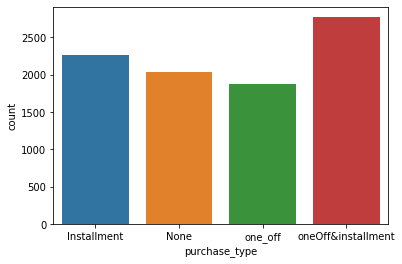

In [252]:
sns.countplot(x='purchase_type', data=credit)

# Data visualisation

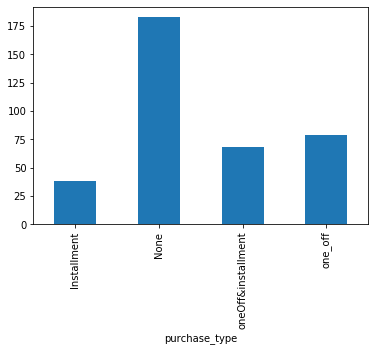

In [253]:
# now that we have added some new derived variables in to the data and
# lets draw some insights from the same.

#1. purchase type VS monthly cash advance amt

credit.groupby('purchase_type').apply(lambda x:np.mean(x['cash_advance_amount'])).plot.bar()


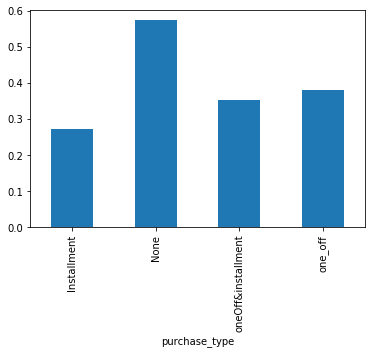

In [254]:
#2 purchase type VS limit usage

credit.groupby('purchase_type').apply(lambda x:np.mean(x['limit_usage'])).plot.bar()

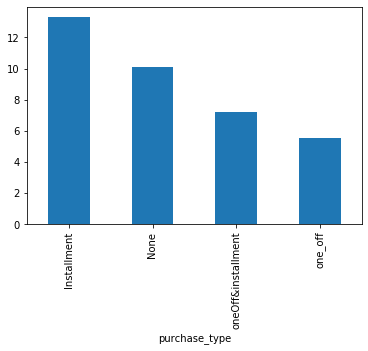

In [255]:
#3.purchase type VS payments to min payment ratio

credit.groupby('purchase_type').apply(lambda x:np.mean(x['payment_minpay'])).plot.bar()

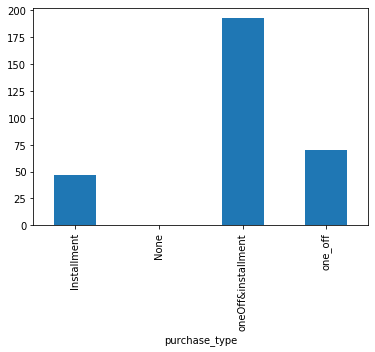

In [256]:
# purchase type VS monthly avg purchase

credit.groupby('purchase_type').apply(lambda x:np.mean(x['Monthly_average_purchase'])).plot.bar()

In [257]:
credit[credit['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,cash_advance_amount,limit_usage,payment_minpay,purchase_type


In [258]:
# Original dataset with categorical column converted to number type.

credit_original = pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)


In [259]:
print(credit_original.head())

   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      0.0    40.900749           0.818182      95.40              0.00   
1      1.0  3202.467416           0.909091       0.00              0.00   
2      2.0  2495.148862           1.000000     773.17            773.17   
3      3.0  1666.670542           0.636364    1499.00           1499.00   
4      4.0   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  TENURE  \
0                    0.000000                          0.083333  ...    12.0   
1   

# Outlier

In [260]:
np.unique(credit['CUST_ID']).any()
# here custumer ids are unique

True

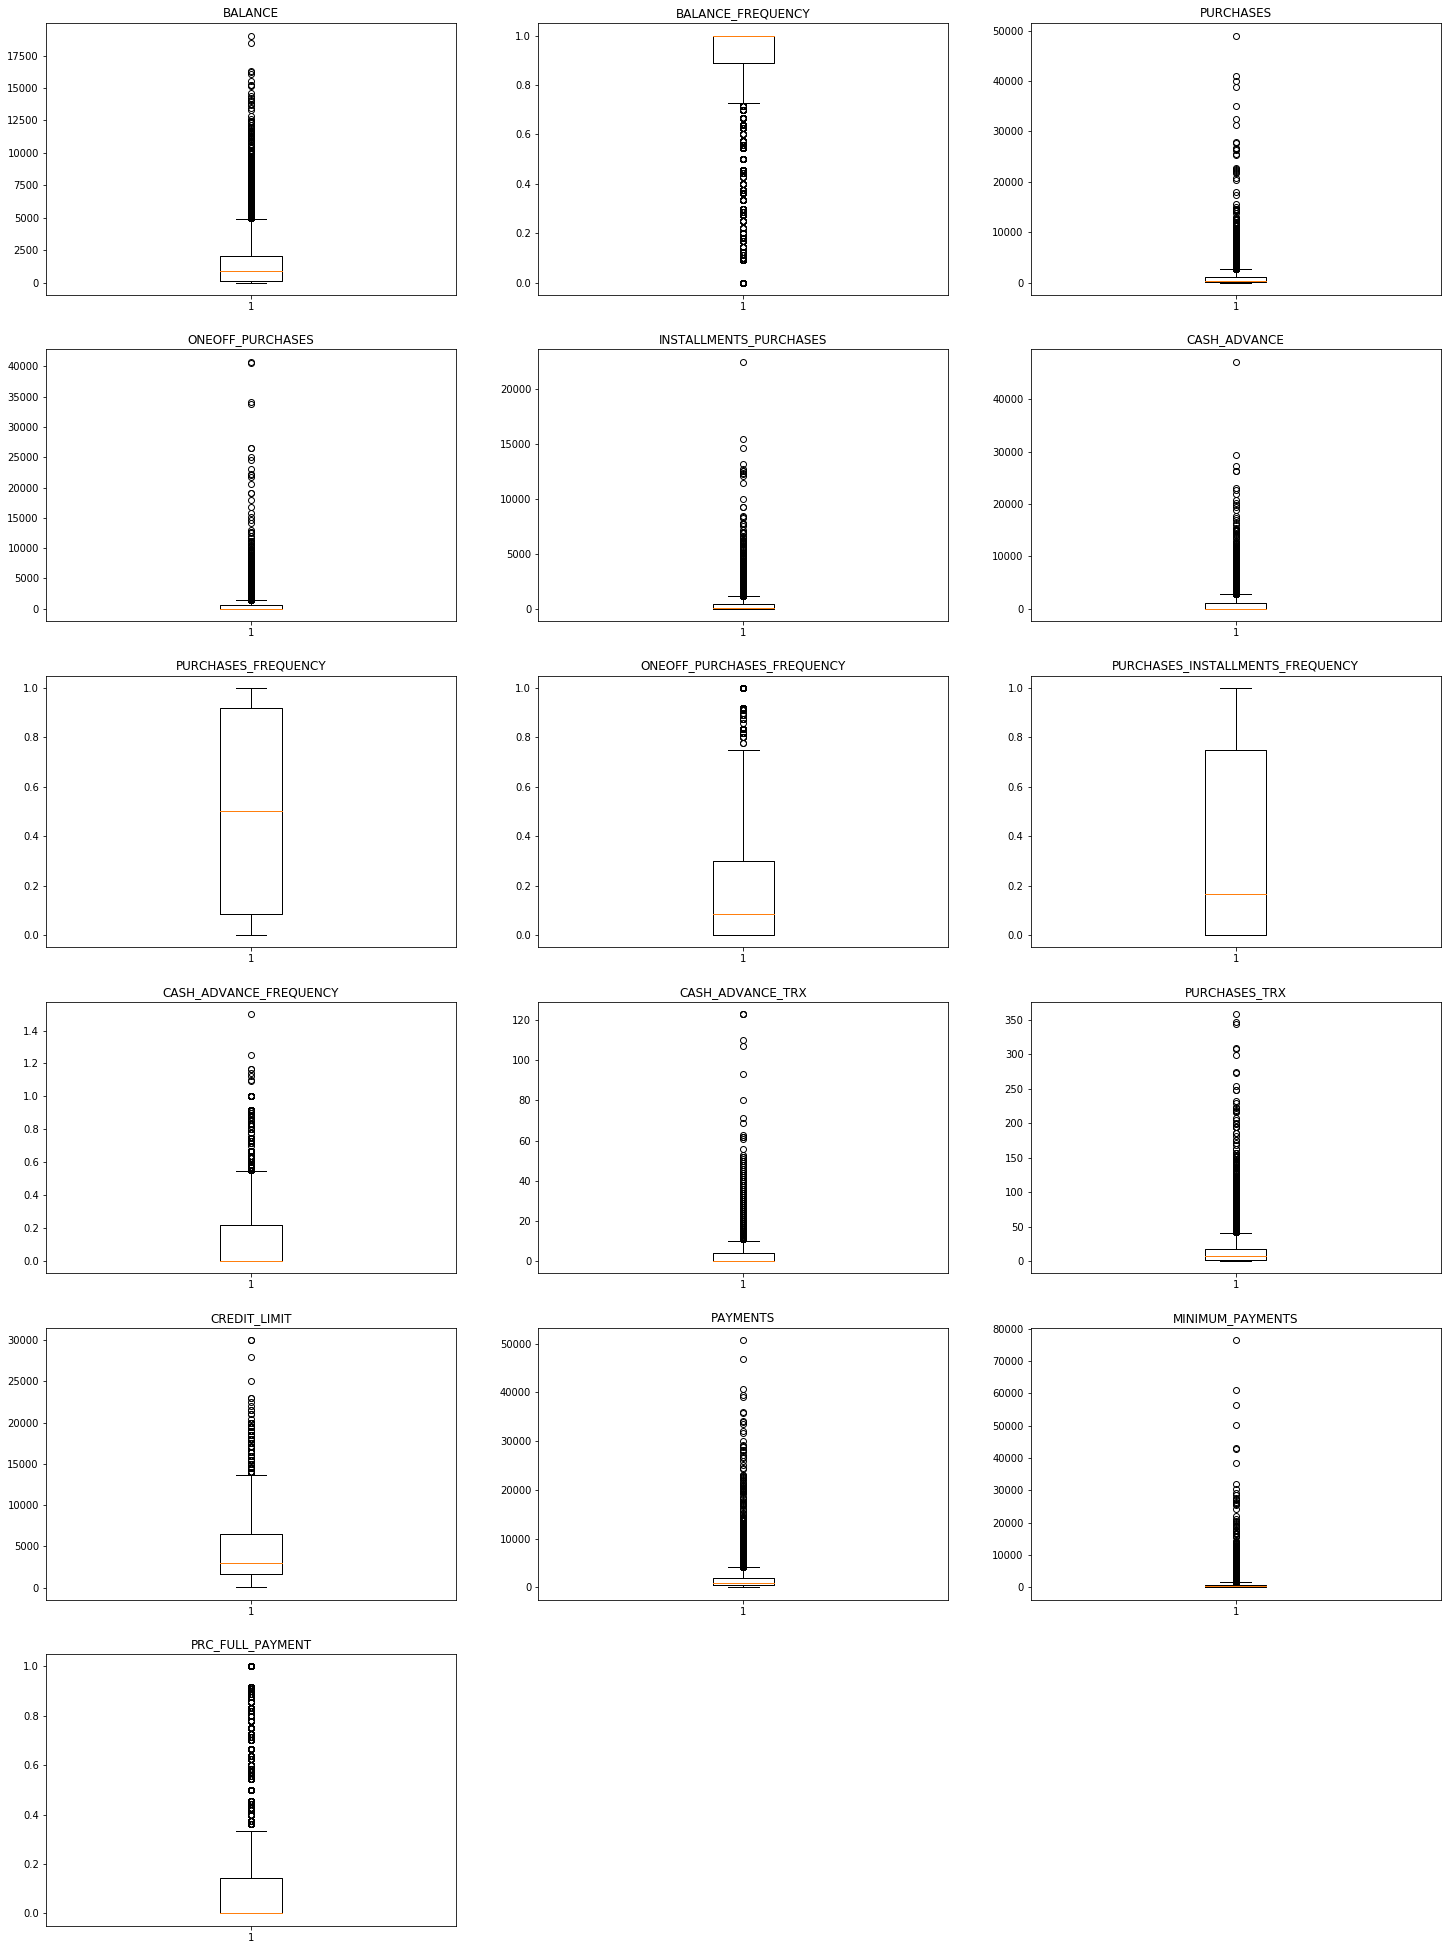

In [261]:
plt.figure(figsize=(25,35))

cnames = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

for i in range(0,16):
    plt.subplot(6,3, i+1)
    plt.boxplot(credit[cnames[i]])
    plt.title(cnames[i])

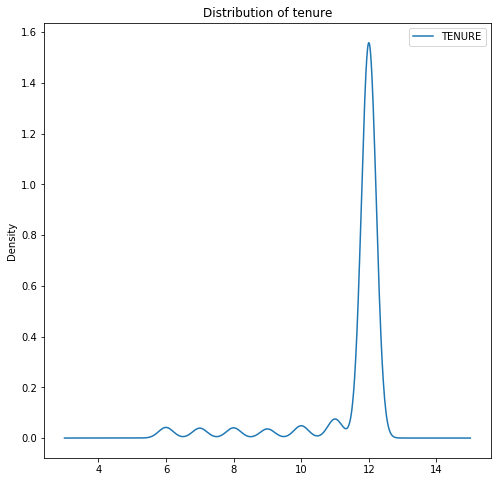

In [262]:
#lets see the distribution of the 'TENURE' alone using KDE plots

credit[['TENURE']].plot.kde(figsize=(8,8), title= 'Distribution of tenure')

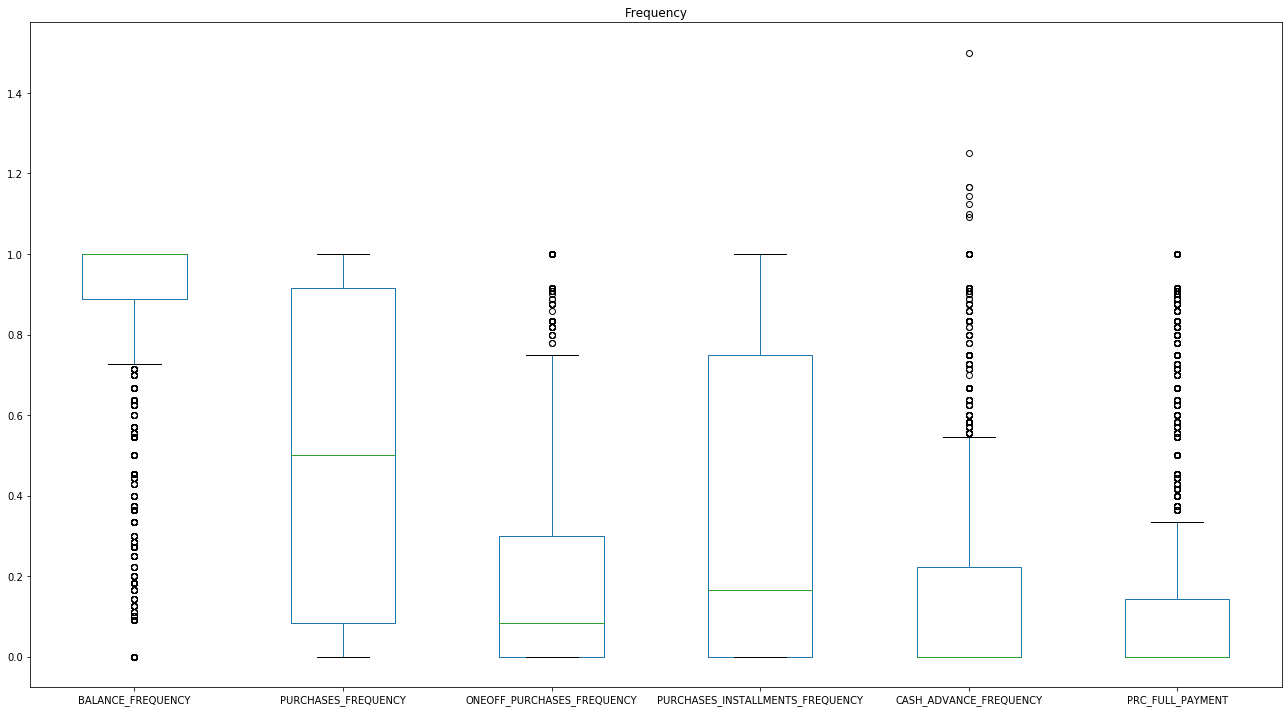

In [263]:
# considering the box plots of only frequency named variables.
credit[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

As we can see through the boxplots plotted above that we have many outliers.

In [264]:
#from the outlier overview section we can see that each variable has many outliers,
#to reduce the outlier effect i will be using log transformation.
#here we will not be using CUST_ID and purchase_type since both are not continuos variables.

credit_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))


In [265]:
credit_log.head(8)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,cash_advance_amount,limit_usage,payment_minpay
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.693147,8.922792,0.000000,6.534915,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360
5,7.501540,0.693147,7.196147,0.000000,7.196147,0.000000,0.510826,0.000000,0.459532,0.000000,...,2.197225,7.496097,7.244983,7.786654,0.000000,2.564949,4.719451,0.000000,0.695874,0.458438
6,6.442955,0.693147,8.866724,8.764620,6.535793,0.000000,0.693147,0.693147,0.693147,0.000000,...,4.174387,9.510519,8.757047,5.293636,0.693147,2.564949,6.383367,0.000000,0.045417,3.498984
7,7.509145,0.693147,6.080391,0.000000,6.080391,0.000000,0.693147,0.000000,0.693147,0.000000,...,2.564949,7.741099,6.522189,6.278585,0.000000,2.564949,3.620333,0.000000,0.583830,0.822576


In [266]:
credit_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,cash_advance_amount,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094838,6.624540,5.900296,0.117730,2.519680,3.050877,2.163970,0.296081,1.361298
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.189745,0.211617,0.130367,2.002823,2.429741,0.250303,0.938668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.120185,0.000000,2.564949,1.481458,0.000000,0.040656,0.651296
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.707595,0.000000,2.564949,3.494587,0.000000,0.264455,1.116067
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.687791,0.133531,2.564949,4.587295,4.606022,0.540911,1.955989
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [267]:
#keeping important KPI's
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=credit_log[[x for x in credit_log.columns if x not in col ]]


In [268]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'cash_advance_amount', 'limit_usage', 'payment_minpay'],
      dtype='object')

In [269]:
credit_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_average_purchase', 'cash_advance_amount',
       'limit_usage', 'payment_minpay'],
      dtype='object')

# Applying machine learning algorithms

In [270]:
# creating Dummies for categorical variable
cr_pre['purchase_type'] = credit.loc[:, 'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Installment,None,oneOff&installment,one_off
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,1,0,0,0
8946,1,0,0,0
8947,1,0,0,0
8948,0,1,0,0


In [271]:
credit_dummy = pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)


In [272]:
credit_dummy = credit_dummy.drop('purchase_type',axis=1)


In [273]:
credit_dummy.head(5)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,cash_advance_amount,limit_usage,payment_minpay,Installment,None,oneOff&installment,one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,1,0,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1


In [274]:
credit_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,cash_advance_amount,limit_usage,payment_minpay,Installment,None,oneOff&installment,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.361298,0.252514,0.228156,0.309944,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.938668,0.434479,0.419667,0.462496,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.651296,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.116067,0.000000,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.955989,1.000000,0.000000,1.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


In [275]:
credit_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_average_purchase            0
cash_advance_amount                 0
limit_usage                         0
payment_minpay                      0
Installment                         0
None                                0
oneOff&installment                  0
one_off                             0
dtype: int64

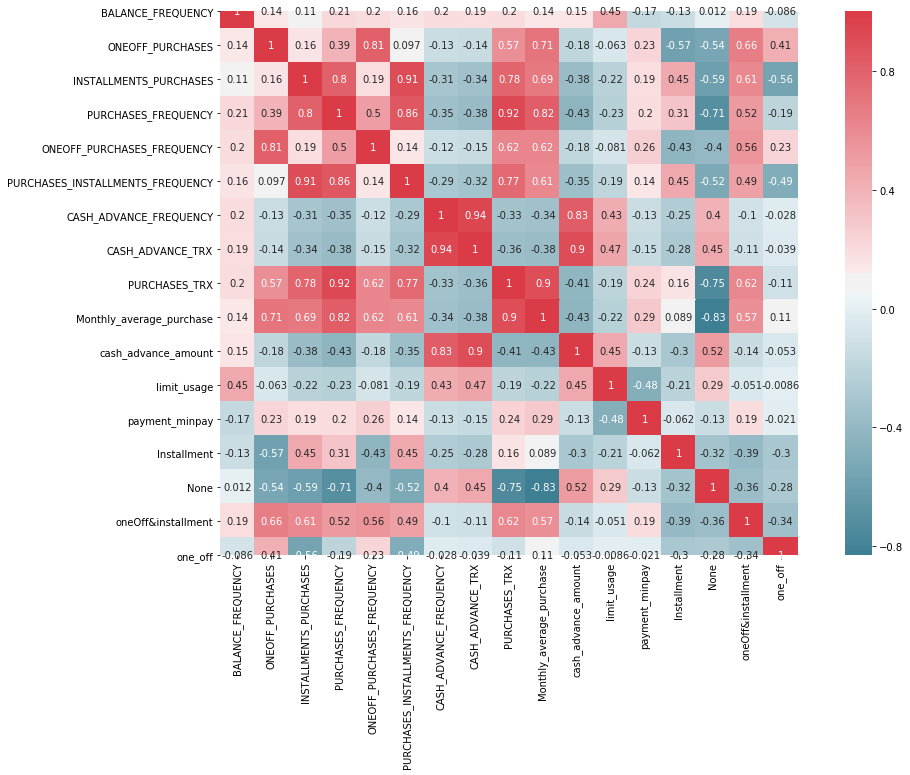

In [276]:
#lets see the correlation again

f, ax = plt.subplots(figsize=(17, 10))

sns.heatmap(credit_dummy.corr(), mask=np.zeros_like(credit_dummy.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

##### Before applying PCA we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

# Feature scaling -Standardization

In [277]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
credit_scaled=sc.fit_transform(credit_dummy)



In [278]:
credit_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ..., -0.54369045,
        -0.67019253, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ...,  1.83928189,
        -0.67019253, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.54369045,
        -0.67019253,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ..., -0.54369045,
        -0.67019253, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ...,  1.83928189,
        -0.67019253, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.54369045,
        -0.67019253,  1.94316249]])

In [279]:
#applying PCA

from sklearn.decomposition import PCA


In [280]:
credit_dummy.shape

(8950, 17)

In [281]:
#We have 17 features so our n_component will be 17.
pc = PCA(n_components=17)
credit_pca = pc.fit(credit_scaled)

In [282]:
#Lets check if we will take 17 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(credit_pca.explained_variance_ratio_)

0.9999999999999999

In [283]:
var_ratio={}
for n in range(2,18):
    pc = PCA(n_components=n)
    credit_pca = pc.fit(credit_scaled)
    var_ratio[n] = sum(credit_pca.explained_variance_ratio_)

In [284]:
var_ratio

{2: 0.5826727059951737,
 3: 0.7300331592171293,
 4: 0.811925259000658,
 5: 0.8775395183904643,
 6: 0.9186333950587438,
 7: 0.9410232296982912,
 8: 0.9615994831650372,
 9: 0.9739658499942748,
 10: 0.983585373432082,
 11: 0.9897247583964301,
 12: 0.9927545421603845,
 13: 0.9953905454162583,
 14: 0.9979615375325155,
 15: 0.9996360687188787,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

In [285]:
pc = PCA(n_components=6)

f = pc.fit(credit_scaled)

credit_scaled.shape



(8950, 17)

In [286]:
f.explained_variance_


array([6.83667853, 3.06986435, 2.50540764, 1.39232126, 1.11556705,
       0.69867397])

In [287]:
np.sum(f.explained_variance_)


15.61851280122781

In [288]:
var_ratio

{2: 0.5826727059951737,
 3: 0.7300331592171293,
 4: 0.811925259000658,
 5: 0.8775395183904643,
 6: 0.9186333950587438,
 7: 0.9410232296982912,
 8: 0.9615994831650372,
 9: 0.9739658499942748,
 10: 0.983585373432082,
 11: 0.9897247583964301,
 12: 0.9927545421603845,
 13: 0.9953905454162583,
 14: 0.9979615375325155,
 15: 0.9996360687188787,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

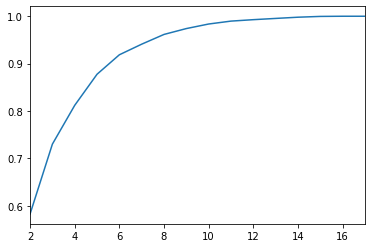

In [289]:
pd.Series(var_ratio).plot()


In [290]:
credit_scaled.shape


(8950, 17)

In [291]:
pc_final = PCA(n_components=6).fit(credit_scaled)

reduced_credit = pc_final.fit_transform(credit_scaled)

In [292]:
dd = pd.DataFrame(reduced_credit)


In [293]:
dd.head()

,0,1,2,3,4,5
0,-0.242739,-2.758085,0.332952,-0.435494,-0.008930,0.033497
1,-3.975749,0.139464,-0.539536,1.018701,-0.439515,-0.577511
2,1.285838,1.510149,2.707907,-1.897646,0.030957,-0.613973
3,-1.049022,0.675370,2.498654,-1.303086,0.769540,1.418488
4,-1.451986,-0.180086,2.281809,-1.640820,-0.541858,-0.653450


So initially we had 17 variables now its 5 so our variable got reduced

In [294]:
dd.shape

(8950, 6)

In [295]:
col_list = credit_dummy.columns

col_list



Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'cash_advance_amount', 'limit_usage', 'payment_minpay', 'Installment',
       'None', 'oneOff&installment', 'one_off'],
      dtype='object')

In [296]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029378,0.241019,-0.263465,-0.357975,-0.223576,-0.693971
ONEOFF_PURCHASES,0.213983,0.405826,0.240136,0.002391,-0.023268,0.129346
INSTALLMENTS_PURCHASES,0.312031,-0.097552,-0.315820,0.088288,-0.003337,0.117121
PURCHASES_FREQUENCY,0.345785,0.016555,-0.162900,-0.072520,0.117161,-0.085402
ONEOFF_PURCHASES_FREQUENCY,0.214594,0.362013,0.164170,0.036828,-0.051525,-0.104560
PURCHASES_INSTALLMENTS_FREQUENCY,0.295444,-0.111060,-0.330280,0.024526,0.025882,0.005690
CASH_ADVANCE_FREQUENCY,-0.214408,0.286274,-0.277213,0.102812,0.359296,0.064774
CASH_ADVANCE_TRX,-0.229471,0.291759,-0.283706,0.109658,0.331852,0.080950
PURCHASES_TRX,0.355434,0.107226,-0.102569,-0.052274,0.105816,-0.011079
Monthly_average_purchase,0.345920,0.141926,0.024206,-0.076957,0.194969,0.017144


In [297]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402113
PC_1    0.180560
PC_2    0.147360
PC_3    0.081892
PC_4    0.065614
PC_5    0.041094
dtype: float64

# Clustering

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

In [298]:
from sklearn.cluster import KMeans

km_4=KMeans(n_clusters=4,random_state=123)

km_4.fit(reduced_credit)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [299]:
km_4.labels_


array([2, 1, 0, ..., 2, 1, 0], dtype=int32)

In [300]:
pd.Series(km_4.labels_).value_counts()


3    2769
2    2224
1    2088
0    1869
dtype: int64

Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.


# Identify cluster Error


In [301]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    
    clusters = KMeans( num_clusters )
    
    clusters.fit( reduced_credit )
    
    cluster_errors.append( clusters.inertia_ )
    # clusters.inertia_ is basically cluster error here.

In [302]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

,num_clusters,cluster_errors
0,1,139770.071058
1,2,93296.154732
2,3,70750.095055
3,4,49445.131733
4,5,42546.062704
5,6,37707.922009
6,7,34107.658386
7,8,31696.457575
8,9,28839.494190
9,10,26271.546937


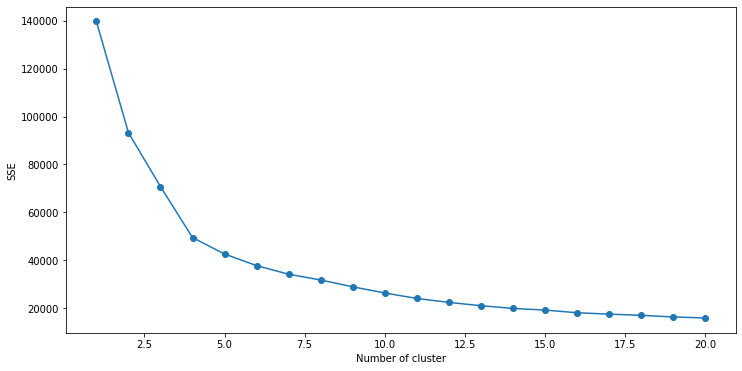

In [303]:
# allow plots to appear in the notebook


plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From above graph we will find elbow range. here it is 4,5,6


### Silhouette Coefficient

In [304]:
from sklearn import metrics


In [305]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []


for k in k_range:
    
    km = KMeans(n_clusters=k, random_state=1)
    
    km.fit(reduced_credit)
    
    scores.append(metrics.silhouette_score(reduced_credit, km.labels_))

In [306]:
scores

[0.33199710400813615,
 0.35442773659212623,
 0.43710799019952934,
 0.4312763214248056,
 0.42295145496081143,
 0.40249158447615413,
 0.405263259064758,
 0.39060395929803937,
 0.36527575096051285,
 0.3683686580219934,
 0.3527453969451114,
 0.3519324305407211,
 0.35304802884157777,
 0.34442463624073355,
 0.3464867768790045,
 0.3387683990579878,
 0.32672510964988777,
 0.3282509463380521,
 0.3359769802822915]

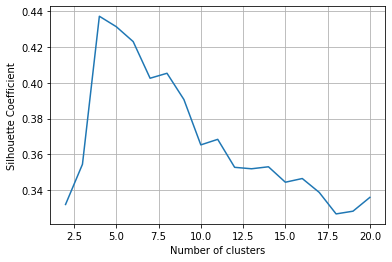

In [307]:
# plot the results

plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

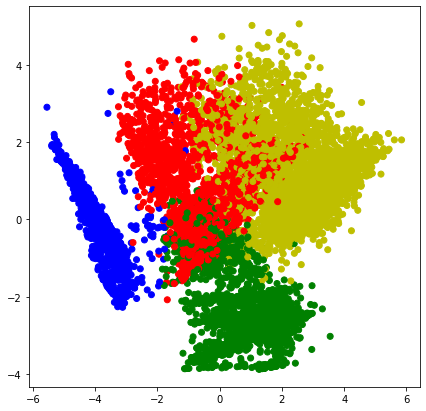

In [308]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_credit[:,0],reduced_credit[:,1],c=label_color)

It is very difficult to draw individual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps


In [309]:
df_pair_plot = pd.DataFrame(reduced_credit,columns=['PC_' +str(i) for i in range(6)])


In [310]:
df_pair_plot['Cluster'] = km_4.labels_ #Add cluster column in the data frame


In [311]:
df_pair_plot.head()


,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242739,-2.758085,0.332952,-0.435494,-0.008930,0.033497,2
1,-3.975749,0.139464,-0.539536,1.018701,-0.439515,-0.577511,1
2,1.285838,1.510149,2.707907,-1.897646,0.030957,-0.613973,0
3,-1.049022,0.675370,2.498654,-1.303086,0.769540,1.418488,0
4,-1.451986,-0.180086,2.281809,-1.640820,-0.541858,-0.653450,0


/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


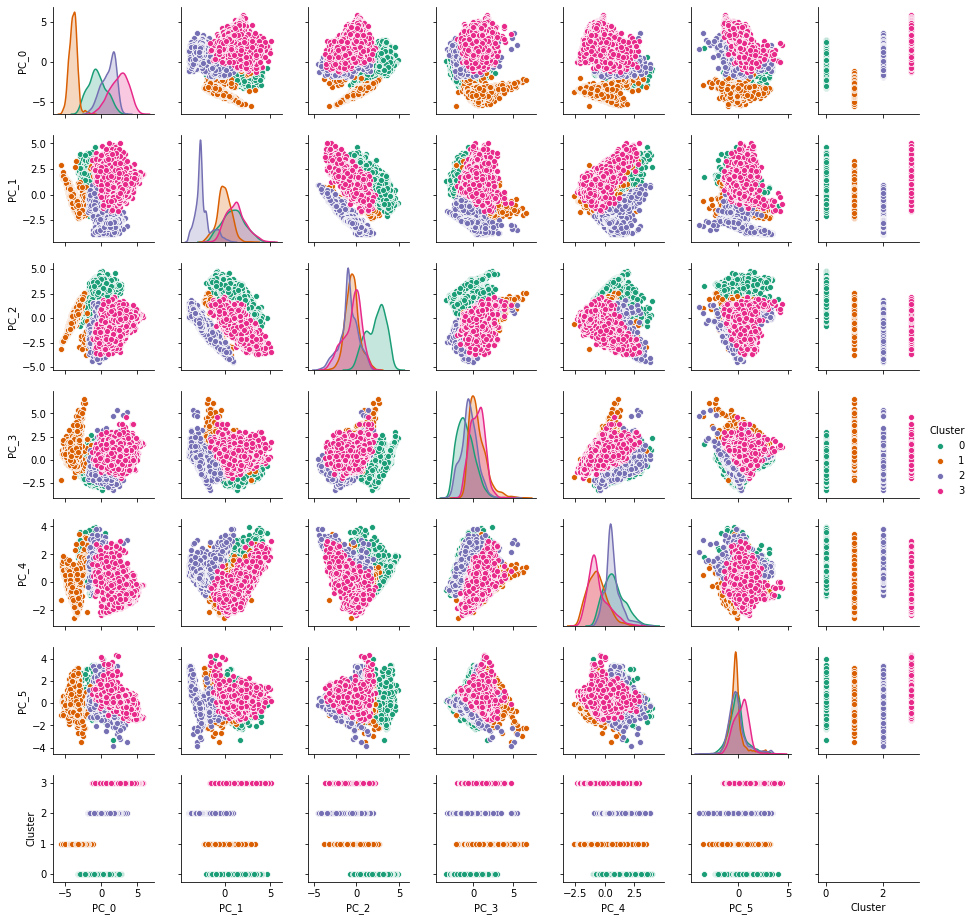

In [312]:
#pairwise relationship of components on the data

sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

It shows that first two components are able to identify clusters
Now we have done here with principle component now we need to come bring our original data frame and we will merge the cluster with them.
To interpret result we need to use our data frame

Key performace variable selection: here i am taking varibales which we will use in derving new KPI. 
We can take all 17 variables but it will be difficult to interprete.So are are selecting less no of variables.

In [313]:
col_kpi=['PURCHASES_TRX','Monthly_average_purchase','cash_advance_amount','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','oneOff&installment','Installment','one_off','None','CREDIT_LIMIT']

In [314]:
cr_pre.describe()


,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,cash_advance_amount,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.361298
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.938668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.651296
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.116067
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.955989
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [315]:
# Conactenating labels found through Kmeans with data 
cluster_df_4 = pd.concat([credit_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [316]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_average_purchase,cash_advance_amount,limit_usage,CASH_ADVANCE_TRX,payment_minpay,oneOff&installment,Installment,one_off,None,CREDIT_LIMIT,Cluster_4
0,2.0,7.950000,0.000000,0.040901,0.0,1.446508,0,1,0,0,1000.0,2
1,0.0,0.000000,536.912124,0.457495,4.0,3.826241,0,0,0,1,7000.0,1
2,12.0,64.430833,0.000000,0.332687,0.0,0.991682,0,0,1,0,7500.0,0
3,1.0,124.916667,17.149001,0.222223,1.0,0.000000,0,0,1,0,7500.0,0
4,1.0,1.333333,0.000000,0.681429,0.0,2.771075,0,0,1,0,1200.0,0


In [318]:
# Mean value gives a good indication of the distribution of data. 
#So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.127341,0.043582,12.062050,33.013723
Monthly_average_purchase,69.875917,0.148297,47.626256,193.008043
cash_advance_amount,78.098613,186.281319,33.550080,67.466910
limit_usage,0.379761,0.576076,0.264745,0.353591
CASH_ADVANCE_TRX,2.881220,6.540230,1.021133,2.804261
payment_minpay,5.548935,9.936620,13.462046,7.243202
oneOff&installment,0.000535,0.001916,0.000000,1.000000
Installment,0.000000,0.017241,1.000000,0.000000
one_off,0.999465,0.002874,0.000000,0.000000
None,0.000000,0.977969,0.000000,0.000000


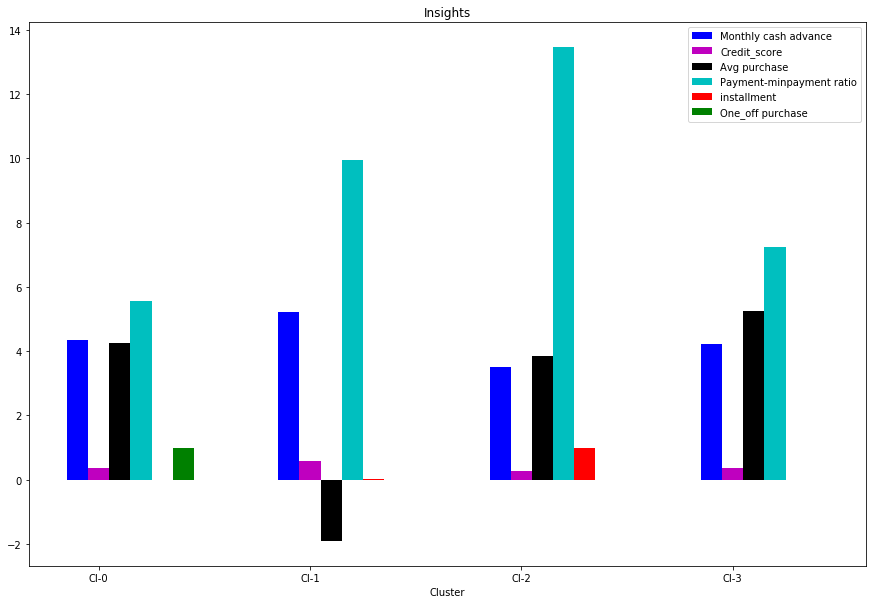

In [320]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['cash_advance_amount',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_average_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['Installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [321]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    1869
1          1    2088
2          2    2224
3          3    2769
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  1869   20.882682
1  2088   23.329609
2  2224   24.849162
3  2769   30.938547


### Finding behaviour with 5 clusters

In [323]:
km_5=KMeans(n_clusters=5,random_state=123)

km_5=km_5.fit(reduced_credit)

km_5.labels_

array([2, 1, 0, ..., 2, 1, 0], dtype=int32)

In [324]:
pd.Series(km_5.labels_).value_counts()


2    2148
1    2081
3    1977
0    1862
4     882
dtype: int64

Text(0, 0.5, 'PC_1')

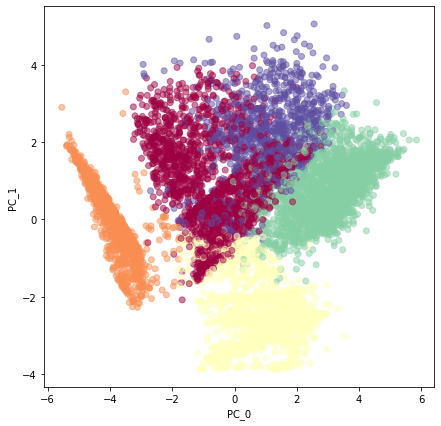

In [328]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_credit[:,0],reduced_credit[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [329]:

cluster_df_5=pd.concat([credit_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)



In [330]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5').apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,7.096670,0.032196,11.905493,34.587759,27.685941
Monthly_average_purchase,68.917645,0.086126,47.384384,210.536468,141.441791
cash_advance_amount,74.517541,185.038534,20.610894,4.040708,249.745380
limit_usage,0.377959,0.576109,0.249683,0.258931,0.600498
CASH_ADVANCE_TRX,2.697637,6.448823,0.546089,0.152757,10.384354
payment_minpay,5.537456,9.963176,13.830541,8.672070,3.648349
oneOff&installment,0.002148,0.000000,0.000000,1.000000,0.899093
Installment,0.000000,0.015858,1.000000,0.000000,0.089569
one_off,0.997852,0.002883,0.000000,0.000000,0.011338
None,0.000000,0.981259,0.000000,0.000000,0.000000


Conclusion With 5 clusters :
We have a group of customers (cluster 1) having highest average purchases but there is Cluster 3 also having highest cash advance & second highest purchase behaviour but their type of purchases are same.
Cluster 0 and Cluster 2 are behaving similar in terms of Credit_limit and Cluster 2 and Cluster 3 have cash transactions is on higher side
So we don't have quite distinguishable characteristics with 5 clusters,

In [331]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

Cluster_5   
0          0    1862
1          1    2081
2          2    2148
3          3    1977
4          4     882
Name: Cluster_5, dtype: int64


In [332]:
# percentage of each cluster

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5
   Size  Percentage
0  1862   20.804469
1  2081   23.251397
2  2148   24.000000
3  1977   22.089385
4   882    9.854749


In [334]:
km_6=KMeans(n_clusters=6).fit(reduced_credit)
km_6.labels_

array([0, 1, 4, ..., 0, 1, 3], dtype=int32)

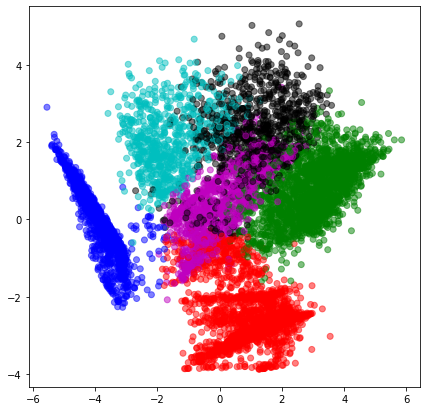

In [336]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_credit[:,0],reduced_credit[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [338]:
cluster_df_6 = pd.concat([credit_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)



In [339]:
six_cluster = cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T

In [340]:
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,11.905537,0.029398,34.663789,5.967143,7.760575,27.890286
Monthly_average_purchase,47.369817,0.078945,211.196582,54.091602,78.585295,140.237987
cash_advance_amount,20.636870,184.574967,4.027720,205.502536,3.603272,243.394103
limit_usage,0.250011,0.575674,0.258206,0.605930,0.245772,0.600743
CASH_ADVANCE_TRX,0.550489,6.414458,0.150838,7.642857,0.125212,10.044571
payment_minpay,13.824435,9.980894,8.699531,3.257979,6.872706,3.613798
oneOff&installment,0.000000,0.000000,1.000000,0.000000,0.006768,0.910857
Installment,1.000000,0.015904,0.000000,0.000000,0.000000,0.089143
one_off,0.000000,0.000000,0.000000,1.000000,0.993232,0.000000
None,0.000000,0.984096,0.000000,0.000000,0.000000,0.000000


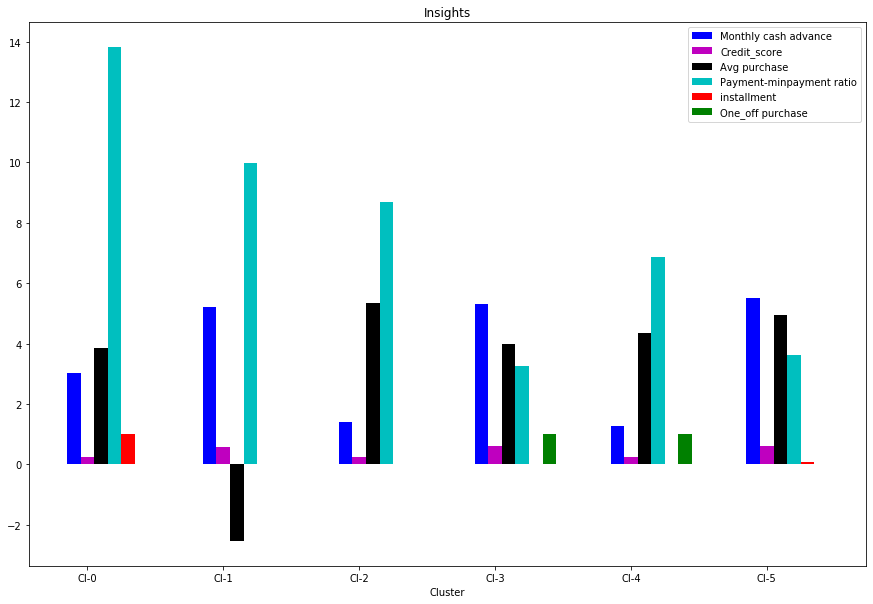

In [341]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['cash_advance_amount',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_average_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['Installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [342]:
cash_advance = np.log(six_cluster.loc['cash_advance_amount',:].values)

credit_score = list(six_cluster.loc['limit_usage',:].values)

cash_advance

array([3.02707927, 5.21805571, 1.39320045, 5.32545837, 1.28184245,
       5.49468195])

Conclusion with 6 clusters:
Here also groups are overlapping. Cl-0 and Cl-2 behaving same

## Checking performance metrics for Kmeans

I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [343]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [345]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_credit)
    score_c[n]=calinski_harabaz_score(reduced_credit,km_score.labels_)
    score[n]=silhouette_score(reduced_credit,km_score.labels_)

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sus

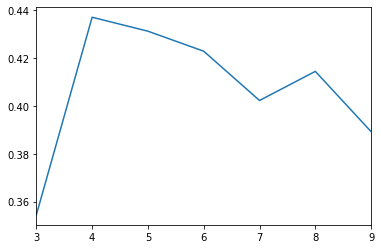

In [346]:
pd.Series(score).plot()

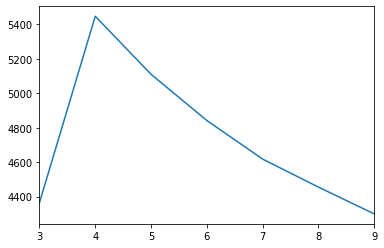

In [347]:
pd.Series(score_c).plot()



Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster.